## Load Dataset

In [1]:
import pandas as pd

In [2]:
# import dataset
ikn_df = pd.read_csv('ikn_fb_comment.csv')
ikn_df.head()

,id,postTitle,facebookUrl,profileId,profileName,date,text
0,Y29tbWVudDo2MjQ2NDkyNzAyMTMxMzc1XzEzMDg4NzI4ND...,Presiden Jokowi akhirnya mengumumkan logo IKN ...,https://www.facebook.com/jawaposonline/photos/...,pfbid02hVj2e2cxQEEp8UsnQKsxHk8fb8TD15fZF5ZFcGn...,Wahyu Soetisna,2023-05-31T01:43:45.000Z,"Keren sih ini, logonya minimalis tpi bermakna...."
1,Y29tbWVudDo2MjQ2NDkyNzAyMTMxMzc1XzczMTU5OTM1NT...,Presiden Jokowi akhirnya mengumumkan logo IKN ...,https://www.facebook.com/jawaposonline/photos/...,pfbid026r3JqJMAhseVtZYDQprcaJ7DUKqA6X3EqfpVnbn...,M Norman Ardiansyah,2023-05-30T12:44:36.000Z,Yg milih paling simpatisan halahhhh
2,Y29tbWVudDo2MjQ2NDkyNzAyMTMxMzc1XzM0OTU2MjQ2Mz...,Presiden Jokowi akhirnya mengumumkan logo IKN ...,https://www.facebook.com/jawaposonline/photos/...,100010570933574,Hik Karyo Tumpuk,2023-05-30T14:56:43.000Z,Logo nya kurang greget pak coba rakyat kasih p...
3,Y29tbWVudDo2MjQ2NDkyNzAyMTMxMzc1Xzc3NDM5NDk4MD...,Presiden Jokowi akhirnya mengumumkan logo IKN ...,https://www.facebook.com/jawaposonline/photos/...,pfbid0saKxptybZ9b2T5xgjcFjVZ9aERroTYYkeczmq6Sf...,Mas Ongen,2023-05-30T12:38:17.000Z,"Logo yg sgt bagus, sebab bermakna dari pohon a..."
4,Y29tbWVudDo2MjQ2NDkyNzAyMTMxMzc1XzE2Mzc2NzQ4MD...,Presiden Jokowi akhirnya mengumumkan logo IKN ...,https://www.facebook.com/jawaposonline/photos/...,pfbid0dbYxtHpmLoTj6ieMa9JSrKoAw4oKDqUFHzKUNKw6...,Aditya Ilhami Anwar,2023-06-03T08:49:10.000Z,Ya bagus seni mendapatkan apresiasi lebih. Tet...


In [3]:
ikn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           1508 non-null   object
 1   postTitle    1508 non-null   object
 2   facebookUrl  1508 non-null   object
 3   profileId    1508 non-null   object
 4   profileName  1508 non-null   object
 5   date         1508 non-null   object
 6   text         1458 non-null   object
dtypes: object(7)
memory usage: 82.6+ KB


## Data Cleaning

In [4]:
# menghapus duplikasi data
ikn_df = ikn_df.drop_duplicates()
ikn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1508 entries, 0 to 1507
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           1508 non-null   object
 1   postTitle    1508 non-null   object
 2   facebookUrl  1508 non-null   object
 3   profileId    1508 non-null   object
 4   profileName  1508 non-null   object
 5   date         1508 non-null   object
 6   text         1458 non-null   object
dtypes: object(7)
memory usage: 94.2+ KB


In [5]:
# menghapus null data
ikn_df = ikn_df.dropna()
ikn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1507
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           1458 non-null   object
 1   postTitle    1458 non-null   object
 2   facebookUrl  1458 non-null   object
 3   profileId    1458 non-null   object
 4   profileName  1458 non-null   object
 5   date         1458 non-null   object
 6   text         1458 non-null   object
dtypes: object(7)
memory usage: 91.1+ KB


In [6]:
# Install Sastrawi
!pip install Sastrawi

Defaulting to user installation because normal site-packages is not writeable


In [7]:
# import library
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

KeyboardInterrupt: 

In [ ]:
# preprocess indonesian text data
def preprocess_text(text):
    # remove url
    text = re.sub(r"http\S+", " ", text)
    # remove angka dan emoji
    text = re.sub(r"\d+", " ", text)
    # remove punctuation
    text = text.translate(str.maketrans("","",string.punctuation))
    # case folding
    text = text.lower()
    # tokenization
    text = word_tokenize(text)
    # remove stopwords
    stop_words = set(stopwords.words('indonesian'))
    text = [word for word in text if word not in stop_words]
    # stemming
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    # join text
    text = ' '.join(text)
    # remove whitespace leading & trailing
    text = text.strip()
    # remove multiple whitespace into single whitespace
    text = re.sub('\s+',' ',text)
    return text


In [ ]:
# apply preprocess_text function to dataset
ikn_df['clean_text'] = ikn_df['text'].apply(preprocess_text)
ikn_df.head()

,id,postTitle,facebookUrl,profileId,profileName,date,text,clean_text
0,Y29tbWVudDo2MjQ2NDkyNzAyMTMxMzc1XzEzMDg4NzI4ND...,Presiden Jokowi akhirnya mengumumkan logo IKN ...,https://www.facebook.com/jawaposonline/photos/...,pfbid02hVj2e2cxQEEp8UsnQKsxHk8fb8TD15fZF5ZFcGn...,Wahyu Soetisna,2023-05-31T01:43:45.000Z,"Keren sih ini, logonya minimalis tpi bermakna....",keren sih logo minimal tpi makna moga daerah j...
1,Y29tbWVudDo2MjQ2NDkyNzAyMTMxMzc1XzczMTU5OTM1NT...,Presiden Jokowi akhirnya mengumumkan logo IKN ...,https://www.facebook.com/jawaposonline/photos/...,pfbid026r3JqJMAhseVtZYDQprcaJ7DUKqA6X3EqfpVnbn...,M Norman Ardiansyah,2023-05-30T12:44:36.000Z,Yg milih paling simpatisan halahhhh,yg milih simpatisan halahhhh
2,Y29tbWVudDo2MjQ2NDkyNzAyMTMxMzc1XzM0OTU2MjQ2Mz...,Presiden Jokowi akhirnya mengumumkan logo IKN ...,https://www.facebook.com/jawaposonline/photos/...,100010570933574,Hik Karyo Tumpuk,2023-05-30T14:56:43.000Z,Logo nya kurang greget pak coba rakyat kasih p...,logo nya greget coba rakyat kasih pilih
3,Y29tbWVudDo2MjQ2NDkyNzAyMTMxMzc1Xzc3NDM5NDk4MD...,Presiden Jokowi akhirnya mengumumkan logo IKN ...,https://www.facebook.com/jawaposonline/photos/...,pfbid0saKxptybZ9b2T5xgjcFjVZ9aERroTYYkeczmq6Sf...,Mas Ongen,2023-05-30T12:38:17.000Z,"Logo yg sgt bagus, sebab bermakna dari pohon a...",logo yg sgt bagus makna pohon tumbuh yg hidup ...
4,Y29tbWVudDo2MjQ2NDkyNzAyMTMxMzc1XzE2Mzc2NzQ4MD...,Presiden Jokowi akhirnya mengumumkan logo IKN ...,https://www.facebook.com/jawaposonline/photos/...,pfbid0dbYxtHpmLoTj6ieMa9JSrKoAw4oKDqUFHzKUNKw6...,Aditya Ilhami Anwar,2023-06-03T08:49:10.000Z,Ya bagus seni mendapatkan apresiasi lebih. Tet...,ya bagus seni apresiasi aplikasi nya paksa ban...


In [ ]:
# menghapus data yang panjangnya kurang dari 3 (whitespace)
ikn_df = ikn_df[ikn_df['clean_text'].str.len() > 3]
ikn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1385 entries, 0 to 1507
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           1385 non-null   object
 1   postTitle    1385 non-null   object
 2   facebookUrl  1385 non-null   object
 3   profileId    1385 non-null   object
 4   profileName  1385 non-null   object
 5   date         1385 non-null   object
 6   text         1385 non-null   object
 7   clean_text   1385 non-null   object
dtypes: object(8)
memory usage: 97.4+ KB


## Auto Labeling with Vader

In [ ]:
# import library
nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from googletrans import Translator

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mkmaa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:

# sentiment analysis using vader
def sentiment_analysis_vader(text):
    # translate text to english
    translator = Translator()
    analysis = translator.translate(text, dest='en')
    # analyze sentiment
    analysis = SentimentIntensityAnalyzer().polarity_scores(analysis.text)
    # translate polarity to sentiment
    if analysis['compound'] > 0:
        return 'positive'
    elif analysis['compound'] == 0:
        return 'neutral'
    else:
        return 'negative'

In [ ]:
# apply sentiment_analysis_vader function to dataset
ikn_df['sentiment'] = ikn_df['clean_text'].apply(sentiment_analysis_vader)
ikn_df.head()

,id,postTitle,facebookUrl,profileId,profileName,date,text,clean_text,sentiment
0,Y29tbWVudDo2MjQ2NDkyNzAyMTMxMzc1XzEzMDg4NzI4ND...,Presiden Jokowi akhirnya mengumumkan logo IKN ...,https://www.facebook.com/jawaposonline/photos/...,pfbid02hVj2e2cxQEEp8UsnQKsxHk8fb8TD15fZF5ZFcGn...,Wahyu Soetisna,2023-05-31T01:43:45.000Z,"Keren sih ini, logonya minimalis tpi bermakna....",keren sih logo minimal tpi makna moga daerah j...,positive
1,Y29tbWVudDo2MjQ2NDkyNzAyMTMxMzc1XzczMTU5OTM1NT...,Presiden Jokowi akhirnya mengumumkan logo IKN ...,https://www.facebook.com/jawaposonline/photos/...,pfbid026r3JqJMAhseVtZYDQprcaJ7DUKqA6X3EqfpVnbn...,M Norman Ardiansyah,2023-05-30T12:44:36.000Z,Yg milih paling simpatisan halahhhh,yg milih simpatisan halahhhh,neutral
2,Y29tbWVudDo2MjQ2NDkyNzAyMTMxMzc1XzM0OTU2MjQ2Mz...,Presiden Jokowi akhirnya mengumumkan logo IKN ...,https://www.facebook.com/jawaposonline/photos/...,100010570933574,Hik Karyo Tumpuk,2023-05-30T14:56:43.000Z,Logo nya kurang greget pak coba rakyat kasih p...,logo nya greget coba rakyat kasih pilih,positive
3,Y29tbWVudDo2MjQ2NDkyNzAyMTMxMzc1Xzc3NDM5NDk4MD...,Presiden Jokowi akhirnya mengumumkan logo IKN ...,https://www.facebook.com/jawaposonline/photos/...,pfbid0saKxptybZ9b2T5xgjcFjVZ9aERroTYYkeczmq6Sf...,Mas Ongen,2023-05-30T12:38:17.000Z,"Logo yg sgt bagus, sebab bermakna dari pohon a...",logo yg sgt bagus makna pohon tumbuh yg hidup ...,positive
4,Y29tbWVudDo2MjQ2NDkyNzAyMTMxMzc1XzE2Mzc2NzQ4MD...,Presiden Jokowi akhirnya mengumumkan logo IKN ...,https://www.facebook.com/jawaposonline/photos/...,pfbid0dbYxtHpmLoTj6ieMa9JSrKoAw4oKDqUFHzKUNKw6...,Aditya Ilhami Anwar,2023-06-03T08:49:10.000Z,Ya bagus seni mendapatkan apresiasi lebih. Tet...,ya bagus seni apresiasi aplikasi nya paksa ban...,positive


In [ ]:
# Count sentiment value
ikn_df['sentiment'].value_counts()

positive    673
neutral     501
negative    211
Name: sentiment, dtype: int64

## Export New Dataset

In [ ]:
# take 100 positive sentiment data
ikn_df_pos = ikn_df[ikn_df['sentiment'] == 'positive'].head(100)
ikn_df_pos.head()


,id,postTitle,facebookUrl,profileId,profileName,date,text,clean_text,sentiment
0,Y29tbWVudDo2MjQ2NDkyNzAyMTMxMzc1XzEzMDg4NzI4ND...,Presiden Jokowi akhirnya mengumumkan logo IKN ...,https://www.facebook.com/jawaposonline/photos/...,pfbid02hVj2e2cxQEEp8UsnQKsxHk8fb8TD15fZF5ZFcGn...,Wahyu Soetisna,2023-05-31T01:43:45.000Z,"Keren sih ini, logonya minimalis tpi bermakna....",keren sih logo minimal tpi makna moga daerah j...,positive
2,Y29tbWVudDo2MjQ2NDkyNzAyMTMxMzc1XzM0OTU2MjQ2Mz...,Presiden Jokowi akhirnya mengumumkan logo IKN ...,https://www.facebook.com/jawaposonline/photos/...,100010570933574,Hik Karyo Tumpuk,2023-05-30T14:56:43.000Z,Logo nya kurang greget pak coba rakyat kasih p...,logo nya greget coba rakyat kasih pilih,positive
3,Y29tbWVudDo2MjQ2NDkyNzAyMTMxMzc1Xzc3NDM5NDk4MD...,Presiden Jokowi akhirnya mengumumkan logo IKN ...,https://www.facebook.com/jawaposonline/photos/...,pfbid0saKxptybZ9b2T5xgjcFjVZ9aERroTYYkeczmq6Sf...,Mas Ongen,2023-05-30T12:38:17.000Z,"Logo yg sgt bagus, sebab bermakna dari pohon a...",logo yg sgt bagus makna pohon tumbuh yg hidup ...,positive
4,Y29tbWVudDo2MjQ2NDkyNzAyMTMxMzc1XzE2Mzc2NzQ4MD...,Presiden Jokowi akhirnya mengumumkan logo IKN ...,https://www.facebook.com/jawaposonline/photos/...,pfbid0dbYxtHpmLoTj6ieMa9JSrKoAw4oKDqUFHzKUNKw6...,Aditya Ilhami Anwar,2023-06-03T08:49:10.000Z,Ya bagus seni mendapatkan apresiasi lebih. Tet...,ya bagus seni apresiasi aplikasi nya paksa ban...,positive
9,Y29tbWVudDo2MjQ2NDkyNzAyMTMxMzc1XzI1MzA1MTMzNz...,Presiden Jokowi akhirnya mengumumkan logo IKN ...,https://www.facebook.com/jawaposonline/photos/...,pfbid04tTqcyxpUPejJxEi5nSKFAn8gtmewdnsP156TFZP...,Subhan Djunaid,2023-05-30T12:55:40.000Z,"Tidak ada urgensinya membangun IKN, sama denga...",urgensi bangun ikn kereta api cepat cuman gaya...,positive


In [ ]:
# take 100 negative sentiment data
ikn_df_neg = ikn_df[ikn_df['sentiment'] == 'negative'].head(100)
ikn_df_neg.head()

,id,postTitle,facebookUrl,profileId,profileName,date,text,clean_text,sentiment
5,Y29tbWVudDo2MjQ2NDkyNzAyMTMxMzc1XzU4MTQ4Njg2Nz...,Presiden Jokowi akhirnya mengumumkan logo IKN ...,https://www.facebook.com/jawaposonline/photos/...,pfbid026r3JqJMAhseVtZYDQprcaJ7DUKqA6X3EqfpVnbn...,M Norman Ardiansyah,2023-05-30T12:44:51.000Z,Gak bangga sama sekali.,gak bangga,negative
12,Y29tbWVudDo2MjQ2NDkyNzAyMTMxMzc1XzYxNzA2MzMxMD...,Presiden Jokowi akhirnya mengumumkan logo IKN ...,https://www.facebook.com/jawaposonline/photos/...,pfbid0Ssbmp6cGGup3hdA89cip5Sf5w8eC4YUw3Zzf3D9H...,Ibnu Kosim,2023-05-31T04:02:29.000Z,Logo halal Malu lihat logo ini,logo halal malu lihat logo,negative
17,Y29tbWVudDo2MjQ2NDkyNzAyMTMxMzc1Xzc3Mzc3OTE1MT...,Presiden Jokowi akhirnya mengumumkan logo IKN ...,https://www.facebook.com/jawaposonline/photos/...,pfbid02fwJKgDhZiBpMrvpg3djD874VZ445ttnNNW9WhuM...,Ardiwae Ardiwae,2023-05-31T10:02:43.000Z,Heyyy jika memang presiden ini bodoh jangan la...,heyyy presiden bodoh pilih nya susah amburadul,negative
18,Y29tbWVudDo2MjQ2NDkyNzAyMTMxMzc1XzgzMjI3MzM4MT...,Presiden Jokowi akhirnya mengumumkan logo IKN ...,https://www.facebook.com/jawaposonline/photos/...,100070101932597,Bagong Delta,2023-05-30T23:28:07.000Z,Kursus Spirituwal Onlen Gratis\n#klas paud\n#k...,kursus spirituwal onlen gratis klas paud klas ...,negative
19,Y29tbWVudDo2MjQ2NDkyNzAyMTMxMzc1XzE2ODE5NDM0MD...,Presiden Jokowi akhirnya mengumumkan logo IKN ...,https://www.facebook.com/jawaposonline/photos/...,pfbid0GwWxxG2CxuysxefihXNStJcGzSj8p47ptq9tJY7W...,Jum Aiyah,2023-05-31T14:52:52.000Z,"RERUSAK .E,DI TABOI,DARI TETANGAN PUTU MU`RAMD...",rusak edi taboidari tetangan putu muramdhan na...,negative


In [ ]:
# take 100 neutral sentiment data
ikn_df_neu = ikn_df[ikn_df['sentiment'] == 'neutral'].head(200)
ikn_df_neu.head()

,id,postTitle,facebookUrl,profileId,profileName,date,text,clean_text,sentiment
1,Y29tbWVudDo2MjQ2NDkyNzAyMTMxMzc1XzczMTU5OTM1NT...,Presiden Jokowi akhirnya mengumumkan logo IKN ...,https://www.facebook.com/jawaposonline/photos/...,pfbid026r3JqJMAhseVtZYDQprcaJ7DUKqA6X3EqfpVnbn...,M Norman Ardiansyah,2023-05-30T12:44:36.000Z,Yg milih paling simpatisan halahhhh,yg milih simpatisan halahhhh,neutral
6,Y29tbWVudDo2MjQ2NDkyNzAyMTMxMzc1Xzc3MzE3NzkwNz...,Presiden Jokowi akhirnya mengumumkan logo IKN ...,https://www.facebook.com/jawaposonline/photos/...,pfbid0GwWxxG2CxuysxefihXNStJcGzSj8p47ptq9tJY7W...,Jum Aiyah,2023-05-31T14:54:04.000Z,"TIDAQ ENEQ GAMBAR DI LAYAR TETV.MU*QU,NYA,,,",tidaq eneq gambar layar tetvmuqunya,neutral
8,Y29tbWVudDo2MjQ2NDkyNzAyMTMxMzc1XzIwMDk4NTc2Mj...,Presiden Jokowi akhirnya mengumumkan logo IKN ...,https://www.facebook.com/jawaposonline/photos/...,100000883505444,Meldhie Cahya Dinata,2023-05-30T12:33:20.000Z,Nanti klo anies jd presiden bakal di audit tuh...,klo anies jd presiden audit tuh proyek,neutral
10,Y29tbWVudDo2MjQ2NDkyNzAyMTMxMzc1XzE2ODUwNjc5Mj...,Presiden Jokowi akhirnya mengumumkan logo IKN ...,https://www.facebook.com/jawaposonline/photos/...,pfbid0JW41JGhNaqFcjx8H451Qr3aPWwufYDEPEn18FRUJ...,RTduatiga Duaulu,2023-05-31T00:36:29.000Z,Cawe cawe\nLanjoooootttttt\nGenjoooooott,cawe cawe lanjoooootttttt genjoooooott,neutral
11,Y29tbWVudDo2MjQ2NDkyNzAyMTMxMzc1XzkzNTg0NDA5MD...,Presiden Jokowi akhirnya mengumumkan logo IKN ...,https://www.facebook.com/jawaposonline/photos/...,100092749698269,Suara Kita,2023-06-03T03:12:41.000Z,Apakah benar Jokowi Cawe-Cawe Soal pilpres 202...,jokowi cawecawe pilpres,neutral


In [ ]:
# combine positive, negative, and neutral sentiment data
ikn_df2 = pd.concat([ikn_df_pos, ikn_df_neg, ikn_df_neu])
ikn_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 564
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           400 non-null    object
 1   postTitle    400 non-null    object
 2   facebookUrl  400 non-null    object
 3   profileId    400 non-null    object
 4   profileName  400 non-null    object
 5   date         400 non-null    object
 6   text         400 non-null    object
 7   clean_text   400 non-null    object
 8   sentiment    400 non-null    object
dtypes: object(9)
memory usage: 31.2+ KB


In [ ]:
# export dataset to csv
ikn_df2.to_csv('ikn_fb_comment_sentiment.csv', index=False)

# TF-IDF and SVM for ikn_df2

In [ ]:
# transform sentiment value to numeric
ikn_df2['sentiment'] = ikn_df2['sentiment'].map({'positive': 1, 'negative': -1, 'neutral': 0})
ikn_df2.head()

,id,postTitle,facebookUrl,profileId,profileName,date,text,clean_text,sentiment
0,Y29tbWVudDo2MjQ2NDkyNzAyMTMxMzc1XzEzMDg4NzI4ND...,Presiden Jokowi akhirnya mengumumkan logo IKN ...,https://www.facebook.com/jawaposonline/photos/...,pfbid02hVj2e2cxQEEp8UsnQKsxHk8fb8TD15fZF5ZFcGn...,Wahyu Soetisna,2023-05-31T01:43:45.000Z,"Keren sih ini, logonya minimalis tpi bermakna....",keren sih logo minimal tpi makna moga daerah j...,1
2,Y29tbWVudDo2MjQ2NDkyNzAyMTMxMzc1XzM0OTU2MjQ2Mz...,Presiden Jokowi akhirnya mengumumkan logo IKN ...,https://www.facebook.com/jawaposonline/photos/...,100010570933574,Hik Karyo Tumpuk,2023-05-30T14:56:43.000Z,Logo nya kurang greget pak coba rakyat kasih p...,logo nya greget coba rakyat kasih pilih,1
3,Y29tbWVudDo2MjQ2NDkyNzAyMTMxMzc1Xzc3NDM5NDk4MD...,Presiden Jokowi akhirnya mengumumkan logo IKN ...,https://www.facebook.com/jawaposonline/photos/...,pfbid0saKxptybZ9b2T5xgjcFjVZ9aERroTYYkeczmq6Sf...,Mas Ongen,2023-05-30T12:38:17.000Z,"Logo yg sgt bagus, sebab bermakna dari pohon a...",logo yg sgt bagus makna pohon tumbuh yg hidup ...,1
4,Y29tbWVudDo2MjQ2NDkyNzAyMTMxMzc1XzE2Mzc2NzQ4MD...,Presiden Jokowi akhirnya mengumumkan logo IKN ...,https://www.facebook.com/jawaposonline/photos/...,pfbid0dbYxtHpmLoTj6ieMa9JSrKoAw4oKDqUFHzKUNKw6...,Aditya Ilhami Anwar,2023-06-03T08:49:10.000Z,Ya bagus seni mendapatkan apresiasi lebih. Tet...,ya bagus seni apresiasi aplikasi nya paksa ban...,1
9,Y29tbWVudDo2MjQ2NDkyNzAyMTMxMzc1XzI1MzA1MTMzNz...,Presiden Jokowi akhirnya mengumumkan logo IKN ...,https://www.facebook.com/jawaposonline/photos/...,pfbid04tTqcyxpUPejJxEi5nSKFAn8gtmewdnsP156TFZP...,Subhan Djunaid,2023-05-30T12:55:40.000Z,"Tidak ada urgensinya membangun IKN, sama denga...",urgensi bangun ikn kereta api cepat cuman gaya...,1


## Converting the textual data to numerical data

In [ ]:
# import library
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , ConfusionMatrixDisplay , classification_report , roc_curve

In [ ]:
transformer = TfidfTransformer(smooth_idf=False)
count_vectorizer = CountVectorizer(ngram_range=(1, 2))
counts = count_vectorizer.fit_transform(ikn_df2['clean_text'].values)
tfidf = transformer.fit_transform(counts)

### split data into train and test data

In [ ]:
targets = ikn_df2['sentiment'].values

In [ ]:
print(f"target shape: {targets.shape}")
print(f"X shape: {tfidf.shape}")

target shape: (400,)
X shape: (400, 3744)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tfidf, targets, test_size=0.2, random_state=49)

In [ ]:
print(f"The shape of X_train is: {X_train.shape[0]}")
print(f"The shape of X_test is: {X_test.shape[0]}")

The shape of X_train is: 320
The shape of X_test is: 80


## Iterate

In [ ]:
def train(model , model_name):
    model.fit(X_train,y_train)
    print(f"Training accuracy of {model_name} is {model.score(X_train,y_train)}")
    print(f"testing accuracy of {model_name} is {model.score(X_test,y_test)}")
def conf_matrix(model):
    ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test
    )
def class_report(model):
    print(classification_report(
        y_test,
        model.predict(X_test)
    ))

## SVM

In [ ]:
# import library
from sklearn.svm import SVC

In [ ]:
svc_model= SVC()

In [ ]:
train(svc_model, 'SVM')

Training accuracy of SVM is 0.996875
testing accuracy of SVM is 0.575


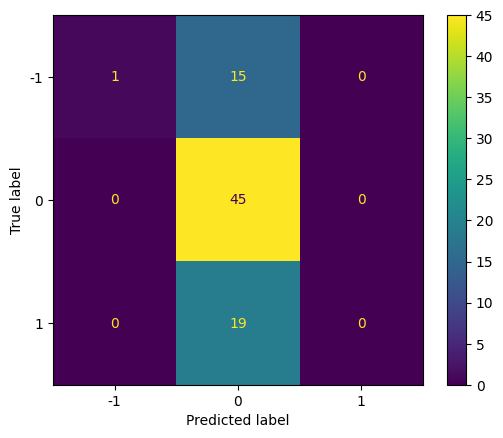

In [ ]:
conf_matrix(svc_model)

In [ ]:
class_report(svc_model)

              precision    recall  f1-score   support

          -1       1.00      0.06      0.12        16
           0       0.57      1.00      0.73        45
           1       0.00      0.00      0.00        19

    accuracy                           0.57        80
   macro avg       0.52      0.35      0.28        80
weighted avg       0.52      0.57      0.43        80



C:\Users\mkmaa\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mkmaa\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mkmaa\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)